In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
dataset=pd.read_csv('prosperLoanData.csv')
dataset.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
dataset.shape

(113937, 81)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

# Perform Data Preparation


In [5]:
#Now ,as per dataset description 5 features contains unique number ListingKey,ListingNumber,LoanKey,LoanNumber and MemberKey.
#Lets check if there are any duplicates available so that we can remove the extra rows.


print(dataset['ListingKey'].nunique())
print(dataset['ListingNumber'].nunique())
print(dataset['LoanKey'].nunique())
print(dataset['LoanNumber'].nunique())
print(dataset['MemberKey'].nunique())

113066
113066
113066
113066
90831


# Data Cleaning

In [6]:
#Lets Try to get rid of duplicate values

dataset.drop_duplicates(subset = 'ListingKey', inplace = True)
dataset.drop_duplicates(subset = 'ListingNumber', inplace = True)
dataset.drop_duplicates(subset = 'LoanKey', inplace = True)
dataset.drop_duplicates(subset = 'LoanNumber', inplace = True)
dataset.drop_duplicates(subset = 'MemberKey', inplace = True)

In [10]:
print(dataset['ListingKey'].nunique())
print(dataset['ListingNumber'].nunique())
print(dataset['LoanKey'].nunique())
print(dataset['LoanNumber'].nunique())
print(dataset['MemberKey'].nunique())

90831
90831
90831
90831
90831


In [13]:
#To check if duplicate values is still present 

print(dataset.ListingKey.duplicated().any())
print(dataset.ListingNumber.duplicated().any())
print(dataset.LoanKey.duplicated().any())
print(dataset.LoanNumber.duplicated().any())
print(dataset.MemberKey.duplicated().any())

False
False
False
False
False


In [14]:
dataset.shape

(90831, 81)

Now,to get the required features column which might help in predicting borrower rate and whether the loan would be timely paid, by conceptualizing financial and social strength

In [19]:
Req_Colmn = dataset[['CreditGrade','Term','ClosedDate','BorrowerAPR','ProsperRating (numeric)','ProsperRating (Alpha)','BorrowerRate','ProsperScore','ListingCategory (numeric)','Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','DateCreditPulled','CreditScoreRangeLower','CreditScoreRangeUpper','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','InquiriesLast6Months','TotalInquiries',
'DelinquenciesLast7Years',
'PublicRecordsLast10Years','PublicRecordsLast12Months','TotalTrades',
'TradesNeverDelinquent (percentage)',
'TradesOpenedLast6Months','DebtToIncomeRatio','IncomeRange','IncomeVerifiable'
,'StatedMonthlyIncome'
,'TotalProsperLoans',
'TotalProsperPaymentsBilled',
'OnTimeProsperPayments',
'ProsperPaymentsLessThanOneMonthLate'
,'ProsperPaymentsOneMonthPlusLate'
,'ProsperPrincipalBorrowed'
,'ProsperPrincipalOutstanding',
'ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent',
'LoanFirstDefaultedCycleNumber',
'LoanMonthsSinceOrigination','LoanOriginalAmount',
'LoanOriginationDate',
'LP_CustomerPayments',
'LP_CustomerPrincipalPayments',
'LP_InterestandFees',
'LP_GrossPrincipalLoss','LoanStatus']]

In [20]:
Req_Colmn.head()

,CreditGrade,Term,ClosedDate,BorrowerAPR,ProsperRating (numeric),ProsperRating (Alpha),BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,...,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_GrossPrincipalLoss,LoanStatus
0,C,36,2009-08-14 00:00:00,0.16516,NaN,NaN,0.1580,NaN,0,Other,...,0,NaN,78,9425,2007-09-12 00:00:00,11396.14,9425.00,1971.14,0.0,Completed
1,NaN,36,NaN,0.12016,6.0,A,0.0920,7.0,2,Professional,...,0,NaN,0,10000,2014-03-03 00:00:00,0.00,0.00,0.00,0.0,Current
2,HR,36,2009-12-17 00:00:00,0.28269,NaN,NaN,0.2750,NaN,0,Other,...,0,NaN,86,3001,2007-01-17 00:00:00,4186.63,3001.00,1185.63,0.0,Completed
3,NaN,36,NaN,0.12528,6.0,A,0.0974,9.0,16,Skilled Labor,...,0,NaN,16,10000,2012-11-01 00:00:00,5143.20,4091.09,1052.11,0.0,Current
4,NaN,36,NaN,0.24614,3.0,D,0.2085,4.0,2,Executive,...,0,NaN,6,15000,2013-09-20 00:00:00,2819.85,1563.22,1256.63,0.0,Current


In [21]:
#Checking how much % of data is null in each column
(Req_Colmn.isnull().sum()/Req_Colmn.shape[0])*100

CreditGrade                            73.766666
Term                                    0.000000
ClosedDate                             54.828197
BorrowerAPR                             0.022019
ProsperRating (numeric)                26.307098
ProsperRating (Alpha)                  26.307098
BorrowerRate                            0.000000
ProsperScore                           26.307098
ListingCategory (numeric)               0.000000
Occupation                              3.512017
EmploymentStatus                        2.121522
EmploymentStatusDuration                7.270645
IsBorrowerHomeowner                     0.000000
DateCreditPulled                        0.000000
CreditScoreRangeLower                   0.561482
CreditScoreRangeUpper                   0.561482
OpenRevolvingAccounts                   0.000000
OpenRevolvingMonthlyPayment             0.000000
InquiriesLast6Months                    0.667173
TotalInquiries                          1.096542
DelinquenciesLast7Ye

In [22]:
#Lets remove all column with more the 80% of missing data

Req_Colmn = Req_Colmn.drop(['TotalProsperLoans','TotalProsperPaymentsBilled', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber'], axis=1)
Req_Colmn.shape

(90831, 39)

In [23]:
#Correcting all Date realted features to Date data types

Req_Colmn['ClosedDate'] = pd.to_datetime(Req_Colmn['ClosedDate'])
Req_Colmn['DateCreditPulled'] = pd.to_datetime(Req_Colmn['DateCreditPulled'])
Req_Colmn['LoanOriginationDate'] = pd.to_datetime(Req_Colmn['LoanOriginationDate'])
Req_Colmn['EmploymentStatusDuration'] = pd.to_datetime(Req_Colmn['EmploymentStatusDuration'])
Req_Colmn['StatedMonthlyIncome'] = pd.to_datetime(Req_Colmn['StatedMonthlyIncome'])
Req_Colmn['LoanMonthsSinceOrigination'] = pd.to_datetime(Req_Colmn['LoanMonthsSinceOrigination'])

In [24]:
Req_Colmn.dtypes

CreditGrade                                   object
Term                                           int64
ClosedDate                            datetime64[ns]
BorrowerAPR                                  float64
ProsperRating (numeric)                      float64
ProsperRating (Alpha)                         object
BorrowerRate                                 float64
ProsperScore                                 float64
ListingCategory (numeric)                      int64
Occupation                                    object
EmploymentStatus                              object
EmploymentStatusDuration              datetime64[ns]
IsBorrowerHomeowner                             bool
DateCreditPulled                      datetime64[ns]
CreditScoreRangeLower                        float64
CreditScoreRangeUpper                        float64
OpenRevolvingAccounts                          int64
OpenRevolvingMonthlyPayment                  float64
InquiriesLast6Months                         f

In [25]:
Req_Colmn.isnull().sum()

CreditGrade                           67003
Term                                      0
ClosedDate                            49801
BorrowerAPR                              20
ProsperRating (numeric)               23895
ProsperRating (Alpha)                 23895
BorrowerRate                              0
ProsperScore                          23895
ListingCategory (numeric)                 0
Occupation                             3190
EmploymentStatus                       1927
EmploymentStatusDuration               6604
IsBorrowerHomeowner                       0
DateCreditPulled                          0
CreditScoreRangeLower                   510
CreditScoreRangeUpper                   510
OpenRevolvingAccounts                     0
OpenRevolvingMonthlyPayment               0
InquiriesLast6Months                    606
TotalInquiries                          996
DelinquenciesLast7Years                 854
PublicRecordsLast10Years                606
PublicRecordsLast12Months       

In [26]:
Req_Colmn['LoanStatus'].value_counts()

Current                   48042
Completed                 25925
Chargedoff                10457
Defaulted                  4644
Past Due (1-15 days)        619
Past Due (31-60 days)       297
Past Due (61-90 days)       237
Past Due (91-120 days)      234
Past Due (16-30 days)       204
FinalPaymentInProgress      155
Past Due (>120 days)         13
Cancelled                     4
Name: LoanStatus, dtype: int64

In [27]:
Req_Colmn['BorrowerAPR']=Req_Colmn['BorrowerAPR'].fillna(Req_Colmn['BorrowerAPR'].mean())
Req_Colmn['ProsperRating (numeric)']=Req_Colmn['ProsperRating (numeric)'].fillna(Req_Colmn['ProsperRating (numeric)'].mean())
Req_Colmn['ProsperScore']=Req_Colmn['ProsperScore'].fillna(Req_Colmn['ProsperScore'].median())
Req_Colmn['Occupation']=Req_Colmn['Occupation'].fillna(Req_Colmn['Occupation'].bfill())
Req_Colmn['EmploymentStatus']=Req_Colmn['EmploymentStatus'].fillna(Req_Colmn['EmploymentStatus'].bfill())
Req_Colmn['EmploymentStatusDuration']=Req_Colmn['EmploymentStatusDuration'].fillna(Req_Colmn['EmploymentStatusDuration'].mean())
Req_Colmn['CreditScoreRangeLower']=Req_Colmn['CreditScoreRangeLower'].fillna(Req_Colmn['CreditScoreRangeLower'].mean())
Req_Colmn['CreditScoreRangeUpper']=Req_Colmn['CreditScoreRangeUpper'].fillna(Req_Colmn['CreditScoreRangeUpper'].mean())
Req_Colmn['InquiriesLast6Months']=Req_Colmn['InquiriesLast6Months'].fillna(Req_Colmn['InquiriesLast6Months'].mean())
Req_Colmn['TotalInquiries']=Req_Colmn['TotalInquiries'].fillna(0)
Req_Colmn['DelinquenciesLast7Years']=Req_Colmn['DelinquenciesLast7Years'].fillna(Req_Colmn['DelinquenciesLast7Years'].mean())
Req_Colmn['PublicRecordsLast10Years']=Req_Colmn['PublicRecordsLast10Years'].fillna(Req_Colmn['PublicRecordsLast10Years'].mean())
Req_Colmn['PublicRecordsLast12Months']=Req_Colmn['PublicRecordsLast12Months'].fillna(Req_Colmn['PublicRecordsLast12Months'].mean())
Req_Colmn['ProsperRating (numeric)']=Req_Colmn['ProsperRating (numeric)'].fillna(0)
Req_Colmn['TotalTrades']=Req_Colmn['TotalTrades'].fillna(0)
Req_Colmn['TradesNeverDelinquent (percentage)']=Req_Colmn['TradesNeverDelinquent (percentage)'].fillna(Req_Colmn['TradesNeverDelinquent (percentage)'].mean())
Req_Colmn['TradesOpenedLast6Months']=Req_Colmn['TradesOpenedLast6Months'].fillna(0)
Req_Colmn['DebtToIncomeRatio']=Req_Colmn['DebtToIncomeRatio'].fillna(0)
Req_Colmn['ProsperRating (Alpha)']=Req_Colmn['ProsperRating (Alpha)'].fillna('C')
Req_Colmn['CreditGrade']=Req_Colmn['CreditGrade'].fillna('C')

In [28]:
Req_Colmn['ProsperScore'].value_counts()

6.0     33766
4.0     10781
8.0      9096
7.0      8480
5.0      7863
3.0      6466
9.0      4986
2.0      4667
10.0     3355
11.0      934
1.0       437
Name: ProsperScore, dtype: int64

In [29]:
#Remocing rows containg with prosper score 11
Req_Colmn = Req_Colmn[Req_Colmn["ProsperScore"] != 11] 

In [30]:
Req_Colmn['ProsperScore'].value_counts()

6.0     33766
4.0     10781
8.0      9096
7.0      8480
5.0      7863
3.0      6466
9.0      4986
2.0      4667
10.0     3355
1.0       437
Name: ProsperScore, dtype: int64

In [31]:
Req_Colmn.head()

,CreditGrade,Term,ClosedDate,BorrowerAPR,ProsperRating (numeric),ProsperRating (Alpha),BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,...,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_GrossPrincipalLoss,LoanStatus
0,C,36,2009-08-14,0.16516,4.073294,C,0.1580,6.0,0,Other,...,1970-01-01 00:00:00.000003083,0,1970-01-01 00:00:00.000000078,9425,2007-09-12,11396.14,9425.00,1971.14,0.0,Completed
1,C,36,NaT,0.12016,6.000000,A,0.0920,7.0,2,Professional,...,1970-01-01 00:00:00.000006125,0,1970-01-01 00:00:00.000000000,10000,2014-03-03,0.00,0.00,0.00,0.0,Current
2,HR,36,2009-12-17,0.28269,4.073294,C,0.2750,6.0,0,Other,...,1970-01-01 00:00:00.000002083,0,1970-01-01 00:00:00.000000086,3001,2007-01-17,4186.63,3001.00,1185.63,0.0,Completed
3,C,36,NaT,0.12528,6.000000,A,0.0974,9.0,16,Skilled Labor,...,1970-01-01 00:00:00.000002875,0,1970-01-01 00:00:00.000000016,10000,2012-11-01,5143.20,4091.09,1052.11,0.0,Current
4,C,36,NaT,0.24614,3.000000,D,0.2085,4.0,2,Executive,...,1970-01-01 00:00:00.000009583,0,1970-01-01 00:00:00.000000006,15000,2013-09-20,2819.85,1563.22,1256.63,0.0,Current


In [32]:
Req_Colmn['LoanStatus'].value_counts()

Current                   47129
Completed                 25906
Chargedoff                10457
Defaulted                  4644
Past Due (1-15 days)        619
Past Due (31-60 days)       297
Past Due (61-90 days)       237
Past Due (91-120 days)      234
Past Due (16-30 days)       204
FinalPaymentInProgress      153
Past Due (>120 days)         13
Cancelled                     4
Name: LoanStatus, dtype: int64

# Data Encoding

In [33]:
#For ssimplicity let keep all past due category in one single .

past_due = {'Past Due (1-15 days)': 'Past Due', 
            'Past Due (16-30 days)': 'Past Due',
              'Past Due (31-60 days)': 'Past Due', 
              'Past Due (61-90 days)': 'Past Due', 
              'Past Due (91-120 days)': 'Past Due', 
              'Past Due (>120 days)': 'Past Due'}
Req_Colmn['LoanStatus'] = Req_Colmn['LoanStatus'].replace(past_due)

In [34]:
Req_Colmn = Req_Colmn[Req_Colmn["LoanStatus"] != "Current"]

In [35]:
Req_Colmn = Req_Colmn[Req_Colmn["LoanStatus"] != "FinalPaymentInProgress"]

In [36]:
Req_Colmn['LoanStatus'].value_counts()

Completed     25906
Chargedoff    10457
Defaulted      4644
Past Due       1604
Cancelled         4
Name: LoanStatus, dtype: int64

In [37]:
Req_Colmn.head()

,CreditGrade,Term,ClosedDate,BorrowerAPR,ProsperRating (numeric),ProsperRating (Alpha),BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,...,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_GrossPrincipalLoss,LoanStatus
0,C,36,2009-08-14,0.16516,4.073294,C,0.1580,6.0,0,Other,...,1970-01-01 00:00:00.000003083,0,1970-01-01 00:00:00.000000078,9425,2007-09-12,11396.1400,9425.00,1971.1400,0.00,Completed
2,HR,36,2009-12-17,0.28269,4.073294,C,0.2750,6.0,0,Other,...,1970-01-01 00:00:00.000002083,0,1970-01-01 00:00:00.000000086,3001,2007-01-17,4186.6300,3001.00,1185.6300,0.00,Completed
11,C,36,2008-01-07,0.15033,4.073294,C,0.1325,6.0,0,Waiter/Waitress,...,1970-01-01 00:00:00.000001666,0,1970-01-01 00:00:00.000000077,1000,2007-10-18,1011.6500,1000.00,11.6500,0.00,Completed
12,C,36,NaT,0.17969,5.000000,B,0.1435,4.0,1,Sales - Retail,...,1970-01-01 00:00:00.000002416,3,1970-01-01 00:00:00.000000002,4000,2014-01-07,135.8174,88.64,47.1774,0.00,Past Due
15,C,36,2012-12-19,0.35797,1.000000,HR,0.3177,5.0,13,Other,...,1970-01-01 00:00:00.000005500,140,1970-01-01 00:00:00.000000023,4000,2012-04-19,521.1300,209.75,311.3800,3790.25,Defaulted


In [38]:
print(Req_Colmn.IncomeRange.value_counts())

$25,000-49,999    12600
$50,000-74,999     9507
Not displayed      6706
$75,000-99,999     4694
$100,000+          4429
$1-24,999          3716
$0                  521
Not employed        442
Name: IncomeRange, dtype: int64


In [39]:
#Req_Colmn['IncomeRange'] = Req_Colmn['IncomeRange'].replace("$0", "Not employed")
Req_Colmn['EmploymentStatus'] = Req_Colmn['EmploymentStatus'].replace('Retired', 'Not employed')

In [40]:
print(Req_Colmn.LoanStatus.value_counts())
print(Req_Colmn.IncomeRange.value_counts())
print(Req_Colmn.EmploymentStatus.value_counts())
print(Req_Colmn['ProsperRating (Alpha)'].value_counts())

Completed     25906
Chargedoff    10457
Defaulted      4644
Past Due       1604
Cancelled         4
Name: LoanStatus, dtype: int64
$25,000-49,999    12600
$50,000-74,999     9507
Not displayed      6706
$75,000-99,999     4694
$100,000+          4429
$1-24,999          3716
$0                  521
Not employed        442
Name: IncomeRange, dtype: int64
Full-time        18649
Employed         14155
Not available     4763
Self-employed     2467
Not employed       969
Part-time          828
Other              784
Name: EmploymentStatus, dtype: int64
C     26768
D      4159
HR     2953
E      2732
B      2459
A      2313
AA     1231
Name: ProsperRating (Alpha), dtype: int64


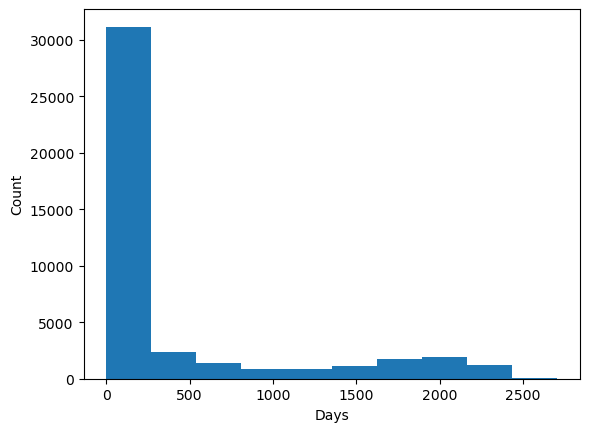

In [41]:
plt.hist(Req_Colmn['LoanCurrentDaysDelinquent'],bins=10)
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

In [42]:
Req_Colmn['LoanStatus']=np.where(Req_Colmn['LoanCurrentDaysDelinquent']<180,'0','1')
Req_Colmn['LoanStatus']=Req_Colmn['ClosedDate'].apply(lambda x:1 if not pd.isnull(x) else 0)
Req_Colmn.head()

,CreditGrade,Term,ClosedDate,BorrowerAPR,ProsperRating (numeric),ProsperRating (Alpha),BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,...,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_GrossPrincipalLoss,LoanStatus
0,C,36,2009-08-14,0.16516,4.073294,C,0.1580,6.0,0,Other,...,1970-01-01 00:00:00.000003083,0,1970-01-01 00:00:00.000000078,9425,2007-09-12,11396.1400,9425.00,1971.1400,0.00,1
2,HR,36,2009-12-17,0.28269,4.073294,C,0.2750,6.0,0,Other,...,1970-01-01 00:00:00.000002083,0,1970-01-01 00:00:00.000000086,3001,2007-01-17,4186.6300,3001.00,1185.6300,0.00,1
11,C,36,2008-01-07,0.15033,4.073294,C,0.1325,6.0,0,Waiter/Waitress,...,1970-01-01 00:00:00.000001666,0,1970-01-01 00:00:00.000000077,1000,2007-10-18,1011.6500,1000.00,11.6500,0.00,1
12,C,36,NaT,0.17969,5.000000,B,0.1435,4.0,1,Sales - Retail,...,1970-01-01 00:00:00.000002416,3,1970-01-01 00:00:00.000000002,4000,2014-01-07,135.8174,88.64,47.1774,0.00,0
15,C,36,2012-12-19,0.35797,1.000000,HR,0.3177,5.0,13,Other,...,1970-01-01 00:00:00.000005500,140,1970-01-01 00:00:00.000000023,4000,2012-04-19,521.1300,209.75,311.3800,3790.25,1


In [43]:
mapping = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 
           5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby and adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
           11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 
           16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}
Req_Colmn['ListingCategory (numeric)'].replace(mapping, inplace = True)

Req_Colmn['ListingCategory (numeric)'].unique()

array(['Not Available', 'Debt Consolidation', 'Household Expenses',
       'Medical/Dental', 'Wedding Loans', 'Other', 'Vacation', 'Auto',
       'Business', 'Taxes', 'Personal Loan', 'Home Improvement',
       'Student Use', 'Motorcycle', 'Engagement Ring', 'Large Purchases',
       'Cosmetic Procedure', 'Boat', 'Baby and adoption', 'RV',
       'Green Loans'], dtype=object)

In [44]:
mapping1={4.073293892673599: 'NA', 1: 'HR', 2: 'E', 3: 'D', 4: 'C', 
           5: 'B', 6: 'A', 7: 'AA'}
Req_Colmn['ProsperRating (numeric)'].replace(mapping1, inplace = True)

Req_Colmn['ProsperRating (numeric)'].unique()

array(['NA', 'B', 'HR', 'D', 'E', 'A', 'AA', 'C'], dtype=object)

In [45]:
Req_Colmn.isnull().sum()

CreditGrade                              0
Term                                     0
ClosedDate                            1604
BorrowerAPR                              0
ProsperRating (numeric)                  0
ProsperRating (Alpha)                    0
BorrowerRate                             0
ProsperScore                             0
ListingCategory (numeric)                0
Occupation                               0
EmploymentStatus                         0
EmploymentStatusDuration                 0
IsBorrowerHomeowner                      0
DateCreditPulled                         0
CreditScoreRangeLower                    0
CreditScoreRangeUpper                    0
OpenRevolvingAccounts                    0
OpenRevolvingMonthlyPayment              0
InquiriesLast6Months                     0
TotalInquiries                           0
DelinquenciesLast7Years                  0
PublicRecordsLast10Years                 0
PublicRecordsLast12Months                0
TotalTrades

In [46]:
Req_Colmn.head()

,CreditGrade,Term,ClosedDate,BorrowerAPR,ProsperRating (numeric),ProsperRating (Alpha),BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,...,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_GrossPrincipalLoss,LoanStatus
0,C,36,2009-08-14,0.16516,NA,C,0.1580,6.0,Not Available,Other,...,1970-01-01 00:00:00.000003083,0,1970-01-01 00:00:00.000000078,9425,2007-09-12,11396.1400,9425.00,1971.1400,0.00,1
2,HR,36,2009-12-17,0.28269,NA,C,0.2750,6.0,Not Available,Other,...,1970-01-01 00:00:00.000002083,0,1970-01-01 00:00:00.000000086,3001,2007-01-17,4186.6300,3001.00,1185.6300,0.00,1
11,C,36,2008-01-07,0.15033,NA,C,0.1325,6.0,Not Available,Waiter/Waitress,...,1970-01-01 00:00:00.000001666,0,1970-01-01 00:00:00.000000077,1000,2007-10-18,1011.6500,1000.00,11.6500,0.00,1
12,C,36,NaT,0.17969,B,B,0.1435,4.0,Debt Consolidation,Sales - Retail,...,1970-01-01 00:00:00.000002416,3,1970-01-01 00:00:00.000000002,4000,2014-01-07,135.8174,88.64,47.1774,0.00,0
15,C,36,2012-12-19,0.35797,HR,HR,0.3177,5.0,Household Expenses,Other,...,1970-01-01 00:00:00.000005500,140,1970-01-01 00:00:00.000000023,4000,2012-04-19,521.1300,209.75,311.3800,3790.25,1


In [47]:
Req_Colmn.dtypes

CreditGrade                                   object
Term                                           int64
ClosedDate                            datetime64[ns]
BorrowerAPR                                  float64
ProsperRating (numeric)                       object
ProsperRating (Alpha)                         object
BorrowerRate                                 float64
ProsperScore                                 float64
ListingCategory (numeric)                     object
Occupation                                    object
EmploymentStatus                              object
EmploymentStatusDuration              datetime64[ns]
IsBorrowerHomeowner                             bool
DateCreditPulled                      datetime64[ns]
CreditScoreRangeLower                        float64
CreditScoreRangeUpper                        float64
OpenRevolvingAccounts                          int64
OpenRevolvingMonthlyPayment                  float64
InquiriesLast6Months                         f

# Treating Outliers

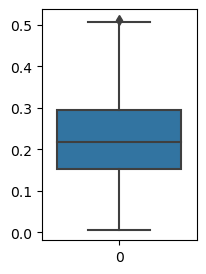

In [48]:
#BorrowerAPR

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['BorrowerAPR'])
plt.show()

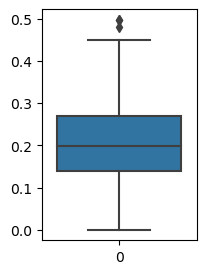

In [49]:
#BorrowerRate

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['BorrowerRate'])
plt.show()

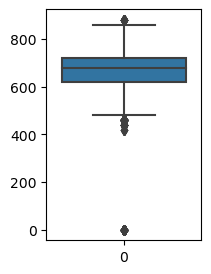

In [50]:
#CreditScoreRangeLower

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['CreditScoreRangeLower'])
plt.show()

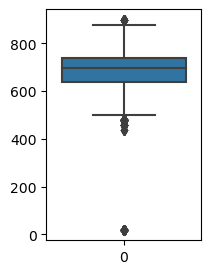

In [51]:
#CreditScoreRangeUpper

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['CreditScoreRangeUpper'])
plt.show()

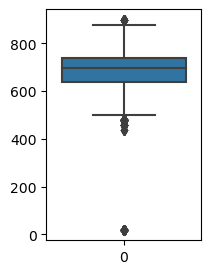

In [52]:
#CreditScoreRangeUpper

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['CreditScoreRangeUpper'])
plt.show()

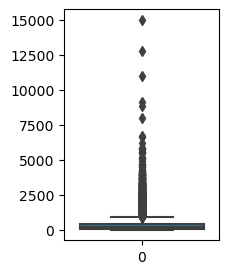

In [53]:
#OpenRevolvingMonthlyPayment

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['OpenRevolvingMonthlyPayment'])
plt.show()

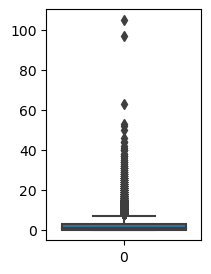

In [54]:
#InquiriesLast6Months

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['InquiriesLast6Months'])
plt.show()

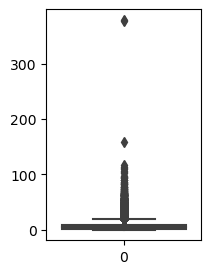

In [55]:
#TotalInquiries

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TotalInquiries'])
plt.show()

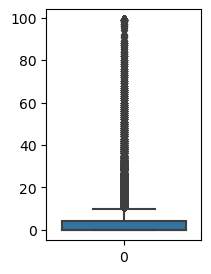

In [56]:
#DelinquenciesLast7Years

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['DelinquenciesLast7Years'])
plt.show()

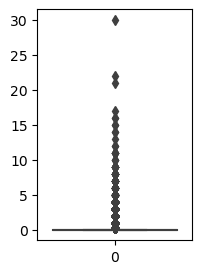

In [57]:
#PublicRecordsLast10Years

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['PublicRecordsLast10Years'])
plt.show()

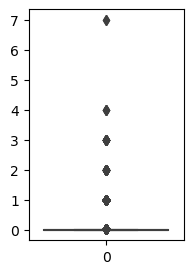

In [58]:
#PublicRecordsLast12Months

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['PublicRecordsLast12Months'])
plt.show()

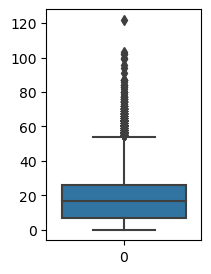

In [59]:
#TotalTrades

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TotalTrades'])
plt.show()

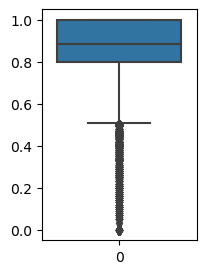

In [60]:
#TradesNeverDelinquent (percentage)

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TradesNeverDelinquent (percentage)'])
plt.show()

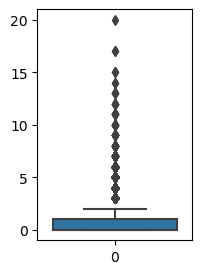

In [61]:
#TradesOpenedLast6Months

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TradesOpenedLast6Months'])
plt.show()

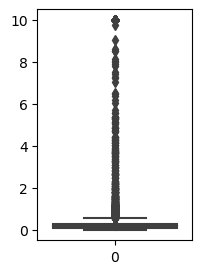

In [62]:
#DebtToIncomeRatio 

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['DebtToIncomeRatio'])
plt.show()

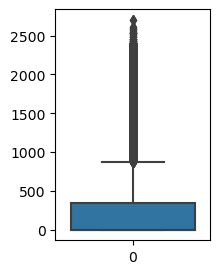

In [63]:
#LoanCurrentDaysDelinquent

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LoanCurrentDaysDelinquent'])
plt.show()

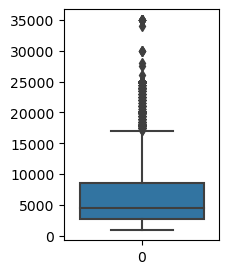

In [64]:
#LoanOriginalAmount

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LoanOriginalAmount'])
plt.show()

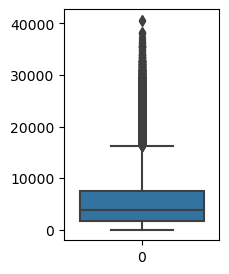

In [65]:
#LP_CustomerPayments

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LP_CustomerPayments'])
plt.show()

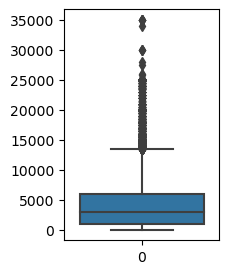

In [66]:
#LP_CustomerPrincipalPayments

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LP_CustomerPrincipalPayments'])
plt.show()

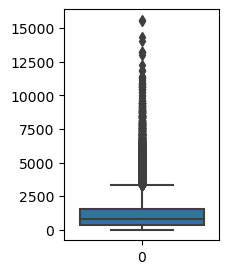

In [67]:
#LP_InterestandFees 

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LP_InterestandFees'])
plt.show()

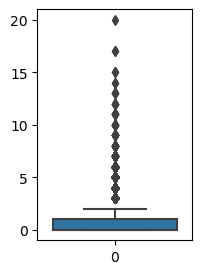

In [68]:
#TradesOpenedLast6Months

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TradesOpenedLast6Months'])
plt.show()

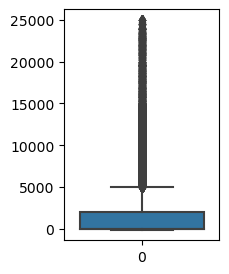

In [69]:
#LP_GrossPrincipalLoss 

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LP_GrossPrincipalLoss'])
plt.show()

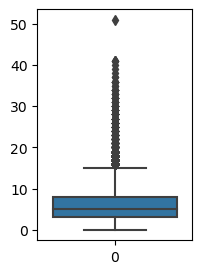

In [70]:
#OpenRevolvingAccounts

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['OpenRevolvingAccounts'])
plt.show()

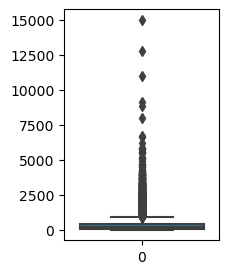

In [71]:
#OpenRevolvingMonthlyPayment

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['OpenRevolvingMonthlyPayment'])
plt.show()

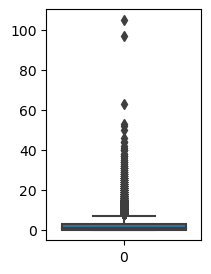

In [72]:
#InquiriesLast6Months

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['InquiriesLast6Months'])
plt.show()


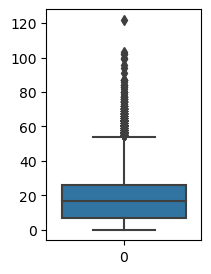

In [73]:
#TotalTrades

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TotalTrades'])
plt.show()

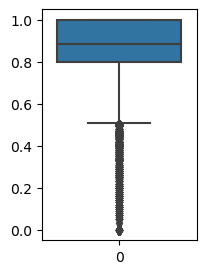

In [74]:
#TradesNeverDelinquent (percentage)

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TradesNeverDelinquent (percentage)'])
plt.show()

In [75]:
Req_Colmn.dtypes

CreditGrade                                   object
Term                                           int64
ClosedDate                            datetime64[ns]
BorrowerAPR                                  float64
ProsperRating (numeric)                       object
ProsperRating (Alpha)                         object
BorrowerRate                                 float64
ProsperScore                                 float64
ListingCategory (numeric)                     object
Occupation                                    object
EmploymentStatus                              object
EmploymentStatusDuration              datetime64[ns]
IsBorrowerHomeowner                             bool
DateCreditPulled                      datetime64[ns]
CreditScoreRangeLower                        float64
CreditScoreRangeUpper                        float64
OpenRevolvingAccounts                          int64
OpenRevolvingMonthlyPayment                  float64
InquiriesLast6Months                         f

In [76]:
#LoanOriginalAmount

q1=Req_Colmn['LoanOriginalAmount'].quantile(0.25)
q3=Req_Colmn['LoanOriginalAmount'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['LoanOriginalAmount'][Req_Colmn['LoanOriginalAmount']<min]=min
Req_Colmn['LoanOriginalAmount'][Req_Colmn['LoanOriginalAmount']>max]=max

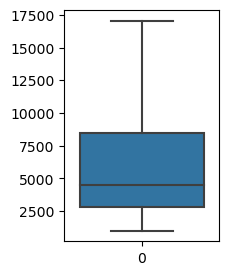

In [77]:
fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LoanOriginalAmount'])
plt.show()

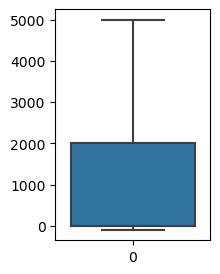

In [78]:
q1=Req_Colmn['LP_GrossPrincipalLoss'].quantile(0.25)
q3=Req_Colmn['LP_GrossPrincipalLoss'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['LP_GrossPrincipalLoss'][Req_Colmn['LP_GrossPrincipalLoss']<min]=min
Req_Colmn['LP_GrossPrincipalLoss'][Req_Colmn['LP_GrossPrincipalLoss']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LP_GrossPrincipalLoss'])
plt.show()

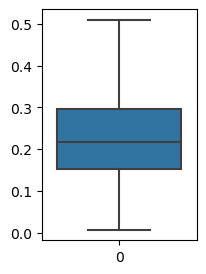

In [79]:
#BorrowerAPR
q1=Req_Colmn['BorrowerAPR'].quantile(0.25)
q3=Req_Colmn['BorrowerAPR'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['BorrowerAPR'][Req_Colmn['BorrowerAPR']<min]=min
Req_Colmn['BorrowerAPR'][Req_Colmn['BorrowerAPR']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['BorrowerAPR'])
plt.show()

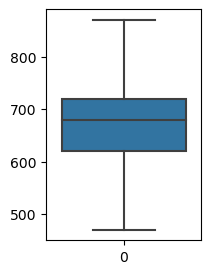

In [80]:
#CreditScoreRangeLower
q1=Req_Colmn['CreditScoreRangeLower'].quantile(0.25)
q3=Req_Colmn['CreditScoreRangeLower'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['CreditScoreRangeLower'][Req_Colmn['CreditScoreRangeLower']<min]=min
Req_Colmn['CreditScoreRangeLower'][Req_Colmn['CreditScoreRangeLower']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['CreditScoreRangeLower'])
plt.show()

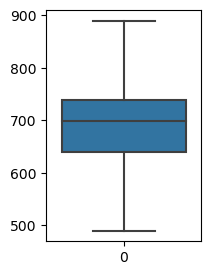

In [81]:
#CreditScoreRangeUpper
q1=Req_Colmn['CreditScoreRangeUpper'].quantile(0.25)
q3=Req_Colmn['CreditScoreRangeUpper'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['CreditScoreRangeUpper'][Req_Colmn['CreditScoreRangeUpper']<min]=min
Req_Colmn['CreditScoreRangeUpper'][Req_Colmn['CreditScoreRangeUpper']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['CreditScoreRangeUpper'])
plt.show()

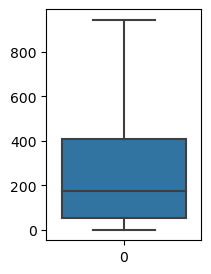

In [82]:
#CreditScoreRangeUpper
q1=Req_Colmn['OpenRevolvingMonthlyPayment'].quantile(0.25)
q3=Req_Colmn['OpenRevolvingMonthlyPayment'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['OpenRevolvingMonthlyPayment'][Req_Colmn['OpenRevolvingMonthlyPayment']<min]=min
Req_Colmn['OpenRevolvingMonthlyPayment'][Req_Colmn['OpenRevolvingMonthlyPayment']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['OpenRevolvingMonthlyPayment'])
plt.show()

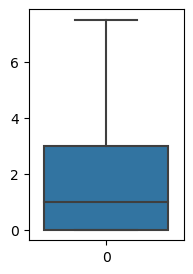

In [83]:
#InquiriesLast6Months
q1=Req_Colmn['InquiriesLast6Months'].quantile(0.25)
q3=Req_Colmn['InquiriesLast6Months'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['InquiriesLast6Months'][Req_Colmn['InquiriesLast6Months']<min]=min
Req_Colmn['InquiriesLast6Months'][Req_Colmn['InquiriesLast6Months']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['InquiriesLast6Months'])
plt.show()

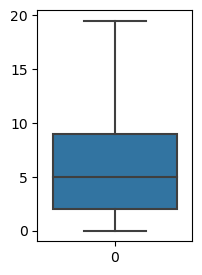

In [84]:
#TotalInquiries
q1=Req_Colmn['TotalInquiries'].quantile(0.25)
q3=Req_Colmn['TotalInquiries'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['TotalInquiries'][Req_Colmn['TotalInquiries']<min]=min
Req_Colmn['TotalInquiries'][Req_Colmn['TotalInquiries']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TotalInquiries'])
plt.show()

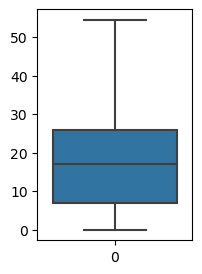

In [85]:
#TotalTrades
q1=Req_Colmn['TotalTrades'].quantile(0.25)
q3=Req_Colmn['TotalTrades'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['TotalTrades'][Req_Colmn['TotalTrades']<min]=min
Req_Colmn['TotalTrades'][Req_Colmn['TotalTrades']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TotalTrades'])
plt.show()

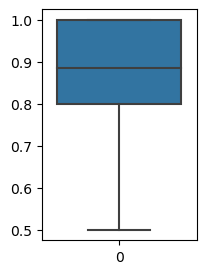

In [86]:
#TradesNeverDelinquent (percentage)
q1=Req_Colmn['TradesNeverDelinquent (percentage)'].quantile(0.25)
q3=Req_Colmn['TradesNeverDelinquent (percentage)'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['TradesNeverDelinquent (percentage)'][Req_Colmn['TradesNeverDelinquent (percentage)']<min]=min
Req_Colmn['TradesNeverDelinquent (percentage)'][Req_Colmn['TradesNeverDelinquent (percentage)']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TradesNeverDelinquent (percentage)'])
plt.show()

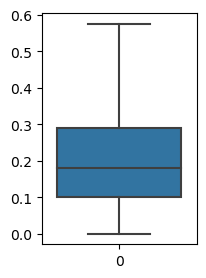

In [87]:
#DebtToIncomeRatio
q1=Req_Colmn['DebtToIncomeRatio'].quantile(0.25)
q3=Req_Colmn['DebtToIncomeRatio'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['DebtToIncomeRatio'][Req_Colmn['DebtToIncomeRatio']<min]=min
Req_Colmn['DebtToIncomeRatio'][Req_Colmn['DebtToIncomeRatio']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['DebtToIncomeRatio'])
plt.show()

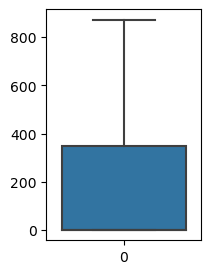

In [88]:
#LoanCurrentDaysDelinquent
q1=Req_Colmn['LoanCurrentDaysDelinquent'].quantile(0.25)
q3=Req_Colmn['LoanCurrentDaysDelinquent'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['LoanCurrentDaysDelinquent'][Req_Colmn['LoanCurrentDaysDelinquent']<min]=min
Req_Colmn['LoanCurrentDaysDelinquent'][Req_Colmn['LoanCurrentDaysDelinquent']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LoanCurrentDaysDelinquent'])
plt.show()

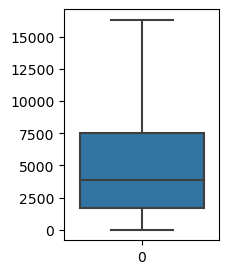

In [89]:
#LP_CustomerPayments
q1=Req_Colmn['LP_CustomerPayments'].quantile(0.25)
q3=Req_Colmn['LP_CustomerPayments'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['LP_CustomerPayments'][Req_Colmn['LP_CustomerPayments']<min]=min
Req_Colmn['LP_CustomerPayments'][Req_Colmn['LP_CustomerPayments']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LP_CustomerPayments'])
plt.show()

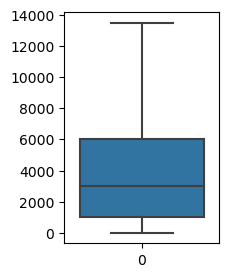

In [90]:
#LP_CustomerPrincipalPayments
q1=Req_Colmn['LP_CustomerPrincipalPayments'].quantile(0.25)
q3=Req_Colmn['LP_CustomerPrincipalPayments'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['LP_CustomerPrincipalPayments'][Req_Colmn['LP_CustomerPrincipalPayments']<min]=min
Req_Colmn['LP_CustomerPrincipalPayments'][Req_Colmn['LP_CustomerPrincipalPayments']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['LP_CustomerPrincipalPayments'])
plt.show()

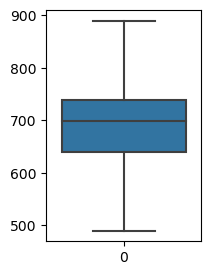

In [91]:
#CreditScoreRangeUpper
q1=Req_Colmn['CreditScoreRangeUpper'].quantile(0.25)
q3=Req_Colmn['CreditScoreRangeUpper'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['CreditScoreRangeUpper'][Req_Colmn['CreditScoreRangeUpper']<min]=min
Req_Colmn['CreditScoreRangeUpper'][Req_Colmn['CreditScoreRangeUpper']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['CreditScoreRangeUpper'])
plt.show()

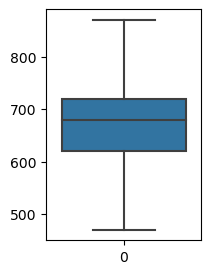

In [92]:
#CreditScoreRangeLower
q1=Req_Colmn['CreditScoreRangeLower'].quantile(0.25)
q3=Req_Colmn['CreditScoreRangeLower'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['CreditScoreRangeLower'][Req_Colmn['CreditScoreRangeLower']<min]=min
Req_Colmn['CreditScoreRangeLower'][Req_Colmn['CreditScoreRangeLower']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['CreditScoreRangeLower'])
plt.show()

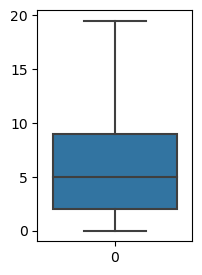

In [93]:
#TotalInquiries
q1=Req_Colmn['TotalInquiries'].quantile(0.25)
q3=Req_Colmn['TotalInquiries'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['TotalInquiries'][Req_Colmn['TotalInquiries']<min]=min
Req_Colmn['TotalInquiries'][Req_Colmn['TotalInquiries']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['TotalInquiries'])
plt.show()

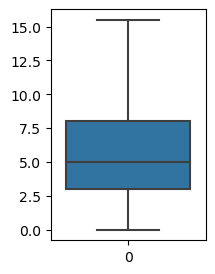

In [94]:
#OpenRevolvingAccounts
q1=Req_Colmn['OpenRevolvingAccounts'].quantile(0.25)
q3=Req_Colmn['OpenRevolvingAccounts'].quantile(0.75)

intr_qr = q3-q1

max=q3+(1.5*intr_qr)
min=q1-(1.5*intr_qr)

Req_Colmn['OpenRevolvingAccounts'][Req_Colmn['OpenRevolvingAccounts']<min]=min
Req_Colmn['OpenRevolvingAccounts'][Req_Colmn['OpenRevolvingAccounts']>max]=max

fig = plt.figure(figsize =(2, 3))
sns.boxplot(data=Req_Colmn['OpenRevolvingAccounts'])
plt.show()

In [95]:
Req_Colmn['ProsperScore'].value_counts()

6.0     26828
8.0      3117
5.0      2453
7.0      2282
4.0      2197
9.0      2079
3.0      1274
10.0     1093
2.0       999
1.0       293
Name: ProsperScore, dtype: int64

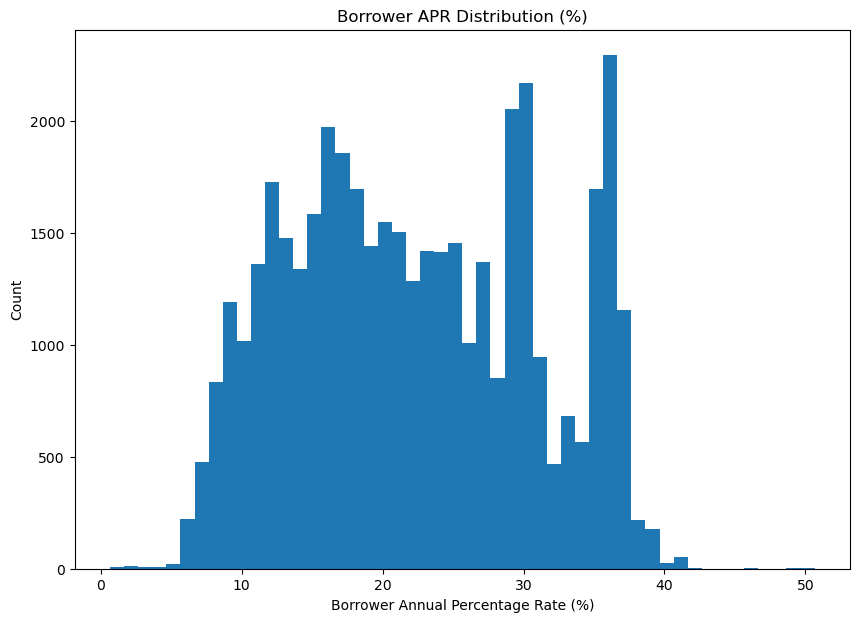

In [96]:
# Distribution of Borrower APR in percentage :

borrowe_APR_percentage = Req_Colmn['BorrowerAPR']*100
bins_range = np.arange(Req_Colmn['BorrowerAPR'].min()*100, Req_Colmn['BorrowerAPR'].max()*100)
plt.figure(figsize=[10, 7])
plt.hist(x = borrowe_APR_percentage, bins = bins_range)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.show()

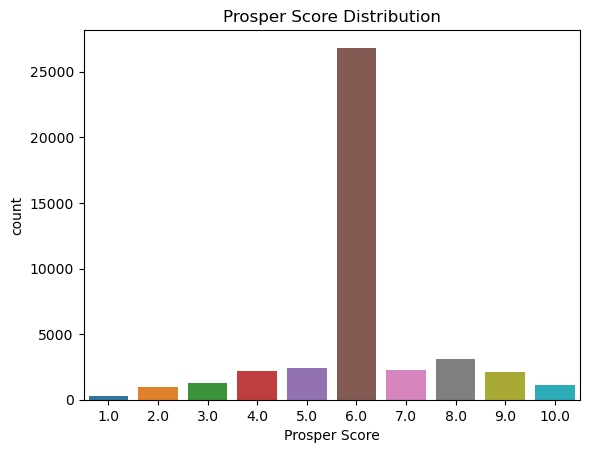

In [97]:
#Prosper Score Distribution :

sns.countplot(data=Req_Colmn, x= 'ProsperScore')
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

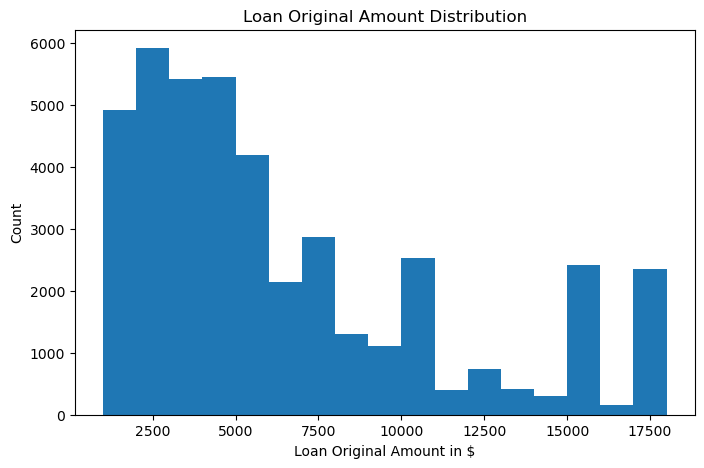

In [98]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(Req_Colmn['LoanOriginalAmount'].min(), Req_Colmn['LoanOriginalAmount'].max()+binsize,binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Req_Colmn, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()

Observation : The distribution is right skewed ,we will use scaling try it in the log scale to see it more better. Also, most of the loan amount is between 3K and 5K. Also I notice increase in amount between 10K and 20K

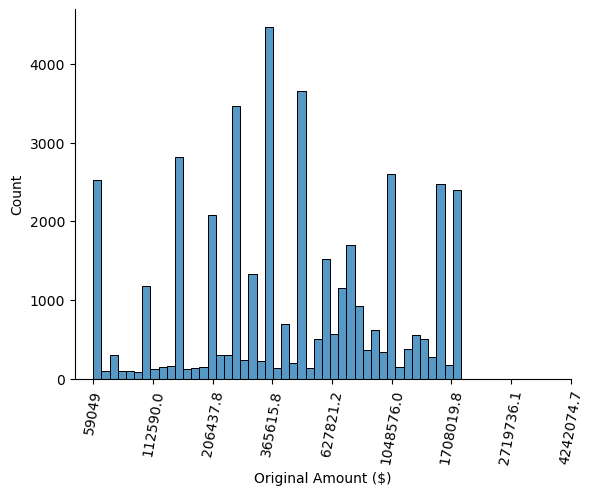

In [99]:
# Define a logarithmic transformation function:

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(x, 10)

sns.histplot(data = Req_Colmn, x = Req_Colmn['LoanOriginalAmount'].apply(log_trans))
x_ticks = [3, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6]
plt.xticks(x_ticks, [round(log_trans(v, inverse=True),1) for v in x_ticks],
            rotation = 80)

plt.xlabel("Original Amount ($)")
sns.despine()
plt.show();

Observation : The highest value for original loan amount seems to be between 3K and 5K.

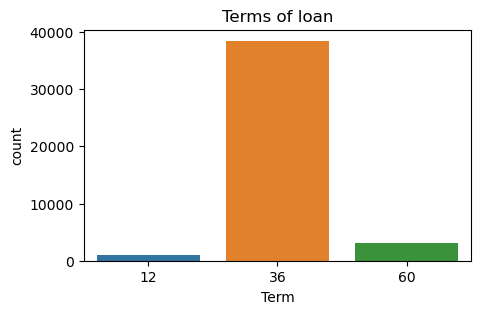

In [100]:
#Term :
plt.figure(figsize=[5, 3])
sns.countplot(data=Req_Colmn,x= 'Term');
plt.title('Terms of loan')
plt.xlabel('Term');

Observation : We can see that, most of the values falls for 36 months term

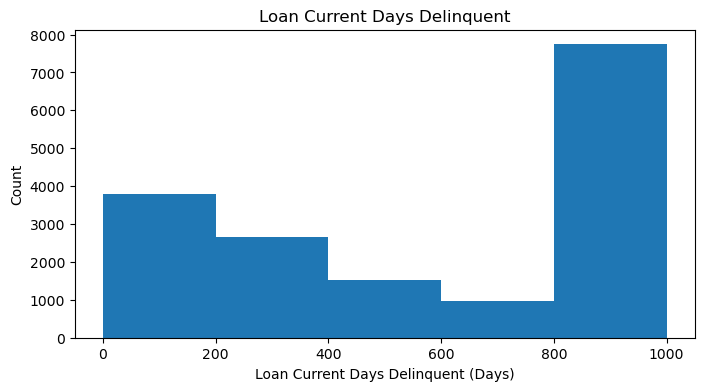

In [101]:
# Loan Current Days Delinquent Distribution
binsize = 200
bins = np.arange(0, Req_Colmn['LoanCurrentDaysDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[8,4])
plt.hist(data = Req_Colmn[Req_Colmn['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.title('Loan Current Days Delinquent')
plt.xlabel('Loan Current Days Delinquent (Days)')
plt.ylabel('Count')
plt.show()

In [102]:
Req_Colmn['LoanCurrentDaysDelinquent'].value_counts()

0.0      25910
872.5     7490
121.0      250
10.0       140
4.0         56
         ...  
796.0        1
859.0        1
687.0        1
791.0        1
735.0        1
Name: LoanCurrentDaysDelinquent, Length: 865, dtype: int64

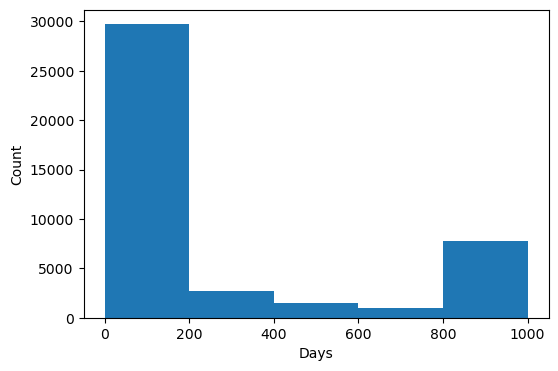

In [103]:
binsize = 200
bins = np.arange(0, Req_Colmn['LoanCurrentDaysDelinquent'].max()+binsize, binsize)
plt.figure(figsize=[6,4])
plt.hist(Req_Colmn['LoanCurrentDaysDelinquent'],bins=bins)
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

Observation : Most of delinquency are present for first 200 days

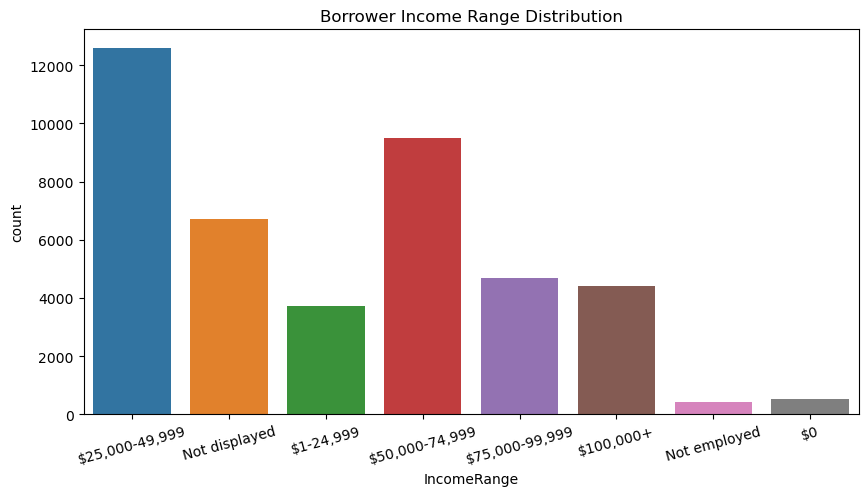

In [104]:
#Borrower Income Range Distrobution
plt.figure(figsize=[10, 5])
sns.countplot(data=Req_Colmn,x='IncomeRange');
plt.title('Borrower Income Range Distribution')
plt.xticks(rotation=15);

Observation : We can see people having income $25,000-49,999 apply for loans the most

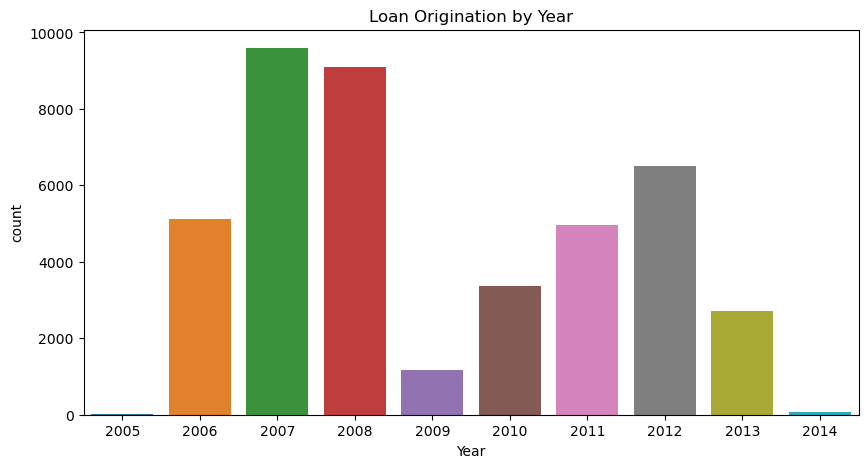

In [107]:
# Loan Origination Date
plt.figure(figsize=[10, 5])
sns.countplot(data=Req_Colmn,x=Req_Colmn['LoanOriginationDate'].dt.year)
plt.title('Loan Origination by Year')
plt.xlabel('Year');

Observation : We can see in year 2007 and 2008 highest oan application,and then drop in 2009 in loans and started increasing gradually

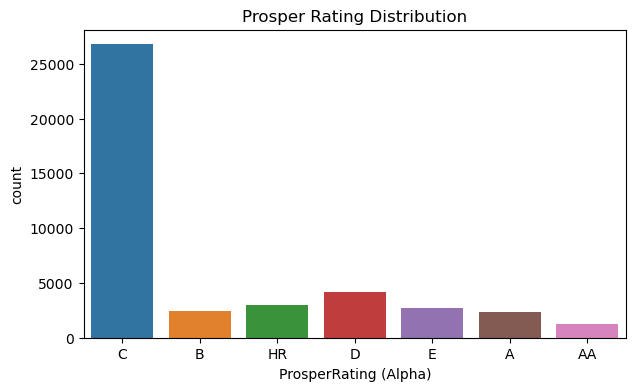

In [108]:
# Prosper Rating Distribution

plt.figure(figsize=[7, 4]);
sns.countplot(data=Req_Colmn,x='ProsperRating (Alpha)');
plt.title('Prosper Rating Distribution');

Observations : Most of the borrowers get the Prosper Rating of 'C'

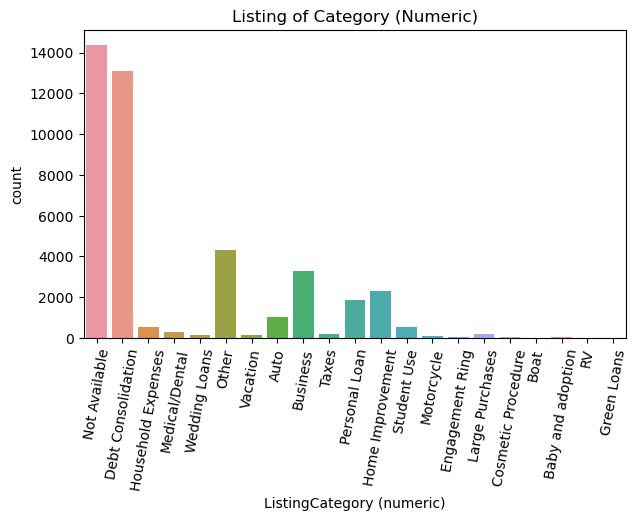

In [109]:
#ListingCategory (numeric)


plt.figure(figsize=[7, 4]);
sns.countplot(data=Req_Colmn,x='ListingCategory (numeric)');
plt.title('Listing of Category (Numeric)');
plt.xticks(rotation=80);

Observtion : Out of all the listing categories, debt consolidation and 'not available' occupies about half of the whole counts,followed by other and Business.

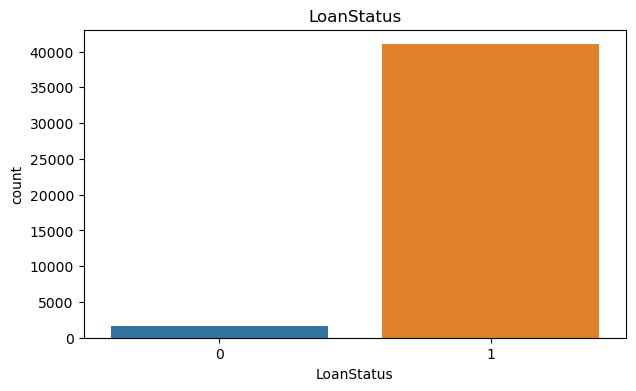

In [111]:
# LoanStatus

plt.figure(figsize=[7, 4]);
sns.countplot(data=Req_Colmn,x='LoanStatus');
plt.title('LoanStatus');

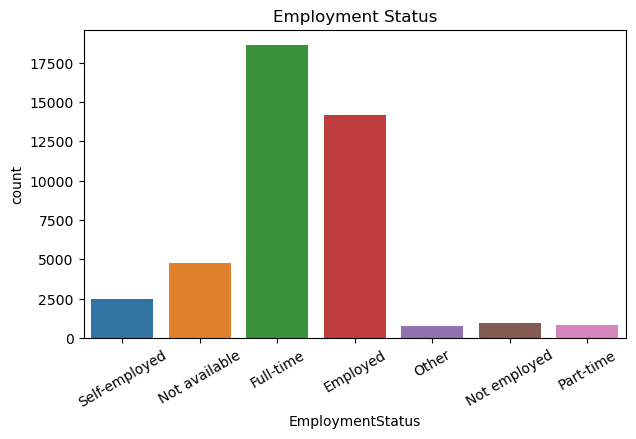

In [112]:
# EmploymentStatus

plt.figure(figsize=[7, 4]);
sns.countplot(data=Req_Colmn,x='EmploymentStatus');
plt.title('Employment Status');
plt.xticks(rotation=30);

Observation : The chart indicates that 'Full-time' is the most common employment status of the borrowers and 'Employed'being next. So the 'Full-time' and 'employed' candidate have easier access to loans, while part-time/not-employed candidates often get rejected.

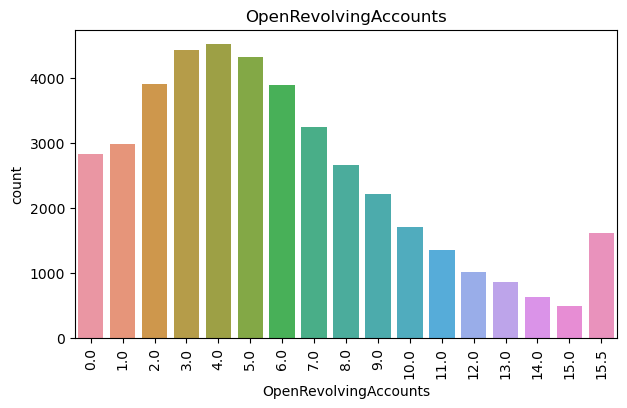

In [113]:
# OpenRevolvingAccounts

plt.figure(figsize=[7, 4]);
sns.countplot(data=Req_Colmn,x='OpenRevolvingAccounts');
plt.title('OpenRevolvingAccounts');
plt.xticks(rotation=90);

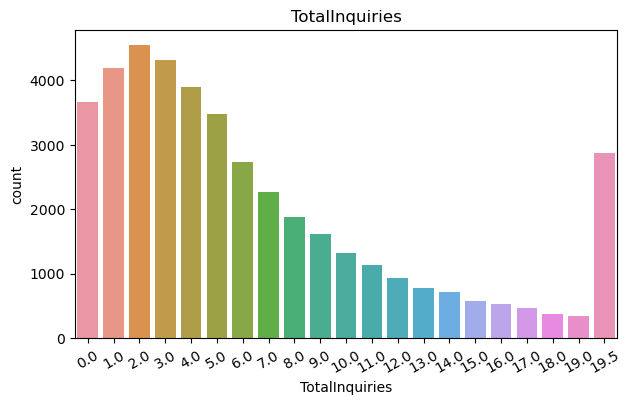

In [114]:
# TotalInquiries

plt.figure(figsize=[7, 4]);
sns.countplot(data=Req_Colmn,x='TotalInquiries');
plt.title('TotalInquiries');
plt.xticks(rotation=30);

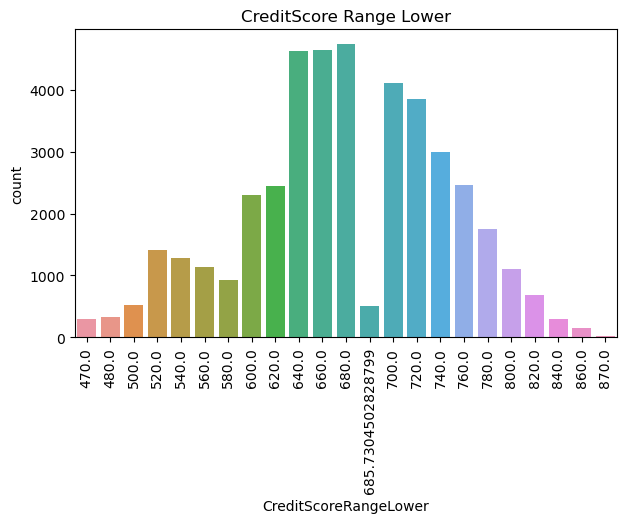

In [115]:
#CreditScoreRangeLower
plt.figure(figsize=[7, 4]);
sns.countplot(data=Req_Colmn,x='CreditScoreRangeLower');
plt.title('CreditScore Range Lower');
plt.xticks(rotation=90);

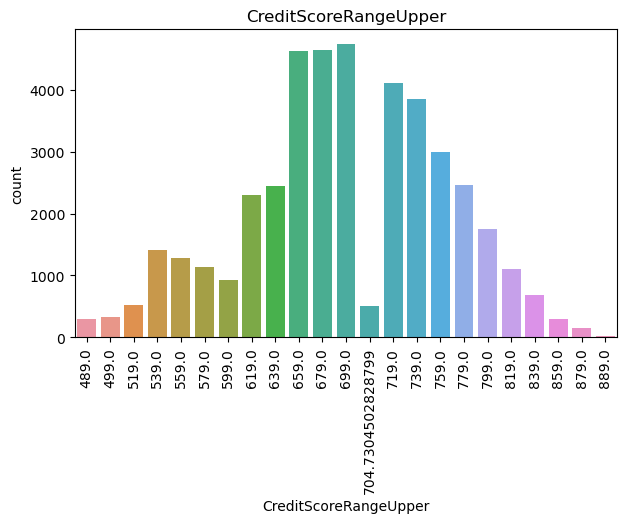

In [116]:
#CreditScoreRangeUpper
plt.figure(figsize=[7, 4]);
sns.countplot(data=Req_Colmn,x='CreditScoreRangeUpper');
plt.title('CreditScoreRangeUpper');
plt.xticks(rotation=90);

## Bivariate Exploration

In [117]:
#investigate variables in pairs for numeric and categorical features
Req_Colmn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42615 entries, 0 to 113929
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CreditGrade                         42615 non-null  object        
 1   Term                                42615 non-null  int64         
 2   ClosedDate                          41011 non-null  datetime64[ns]
 3   BorrowerAPR                         42615 non-null  float64       
 4   ProsperRating (numeric)             42615 non-null  object        
 5   ProsperRating (Alpha)               42615 non-null  object        
 6   BorrowerRate                        42615 non-null  float64       
 7   ProsperScore                        42615 non-null  float64       
 8   ListingCategory (numeric)           42615 non-null  object        
 9   Occupation                          42615 non-null  object        
 10  EmploymentStatus     

In [118]:
numeric_features=['Term', 'BorrowerAPR','BorrowerRate', 'ProsperScore','EmploymentStatusDuration','EmploymentStatus',
                  'DebtToIncomeRatio','StatedMonthlyIncome','LoanOriginalAmount','LoanCurrentDaysDelinquent',
                  'OpenRevolvingAccounts','TotalInquiries','TotalTrades']


categorical_features= ['LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                         'EmploymentStatus', 'IncomeRange']

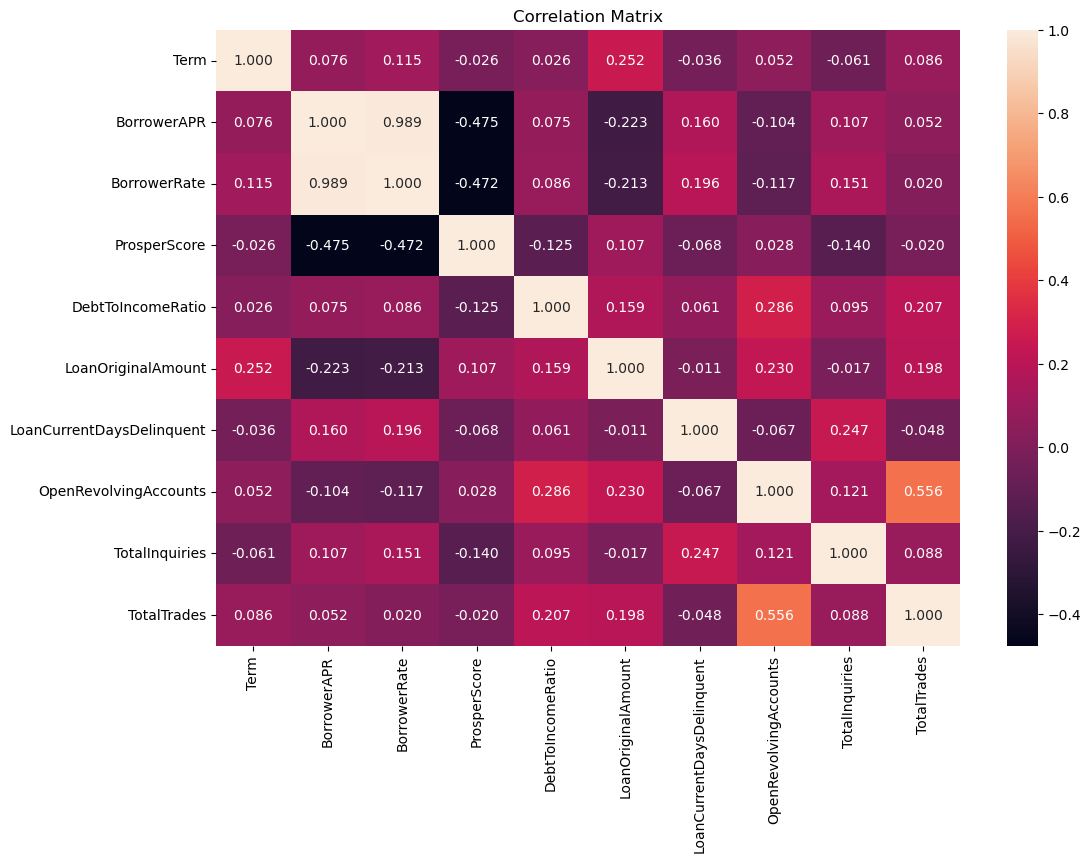

In [119]:
# Correlation matrix for all numeric variables

plt.figure(figsize = [12, 8])
sns.heatmap(Req_Colmn[numeric_features].corr(), annot = True, fmt = '.3f')
plt.title('Correlation Matrix') 
plt.show()

Text(0.5, 1.0, 'ProsperRating by LoanOriginalAmount')

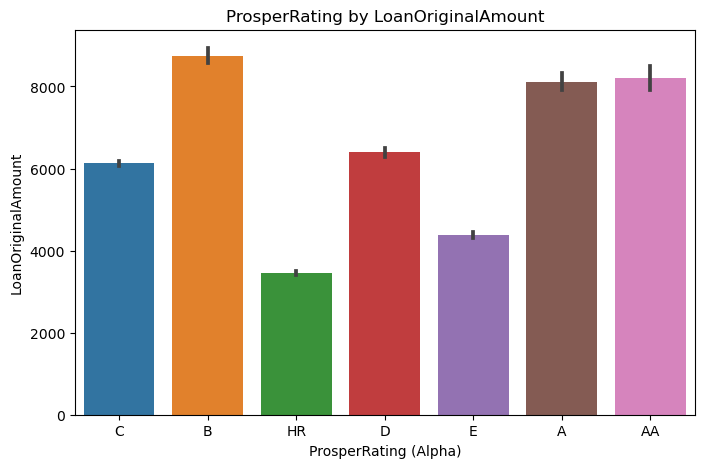

In [120]:
#ProsperRating (Alpha) VS. Original Amount

plt.figure(figsize=(8,5))
sns.barplot(x='ProsperRating (Alpha)',y='LoanOriginalAmount',data=Req_Colmn)
plt.title("ProsperRating by LoanOriginalAmount")

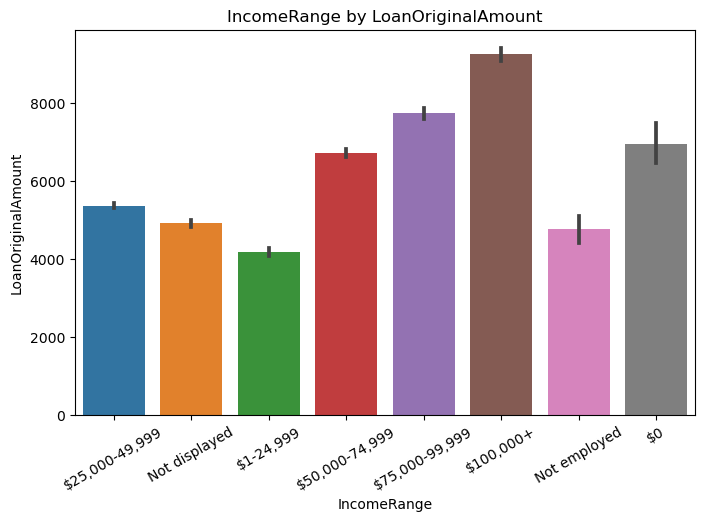

In [121]:
#IncomeRange VS. Original Amount

plt.figure(figsize=(8,5))
sns.barplot(x='IncomeRange',y='LoanOriginalAmount',data=Req_Colmn)
plt.title("IncomeRange by LoanOriginalAmount")
plt.xticks(rotation=30);

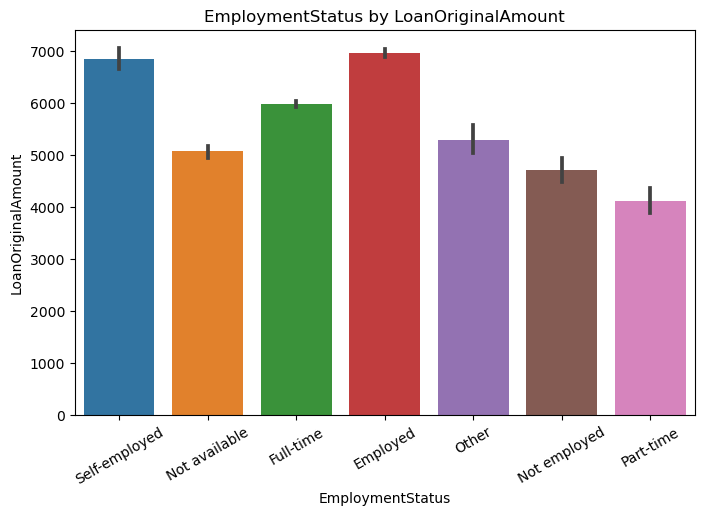

In [122]:
#EmploymentStatus VS. Original Amount

plt.figure(figsize=(8,5))
sns.barplot(x='EmploymentStatus',y='LoanOriginalAmount',data=Req_Colmn)
plt.title("EmploymentStatus by LoanOriginalAmount")
plt.xticks(rotation=30);

Text(0.5, 1.0, 'BorrowerAPR Vs LoanStatus')

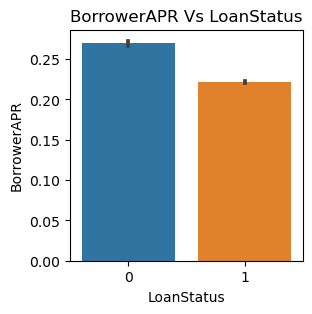

In [123]:
#BorrowerAPR Vs LoanStatus

plt.figure(figsize=(3,3))
sns.barplot(x='LoanStatus',y='BorrowerAPR',data=Req_Colmn)
plt.title("BorrowerAPR Vs LoanStatus")

Text(0.5, 1.0, 'BorrowerAPR Vs LoanStatus')

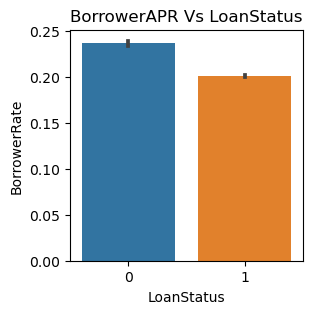

In [124]:
#BorrowerAPR Vs LoanStatus

plt.figure(figsize=(3,3))
sns.barplot(x='LoanStatus',y='BorrowerRate',data=Req_Colmn)
plt.title("BorrowerAPR Vs LoanStatus")

Text(0.5, 1.0, 'ProsperScore Vs LoanStatus')

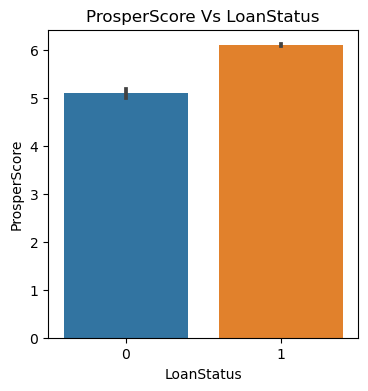

In [125]:
#ProsperScore Vs LoanStatus

plt.figure(figsize=(4,4))
sns.barplot(x='LoanStatus',y='ProsperScore',data=Req_Colmn)
plt.title("ProsperScore Vs LoanStatus")

Text(0.5, 1.0, 'LoanOriginalAmount Vs LoanStatus')

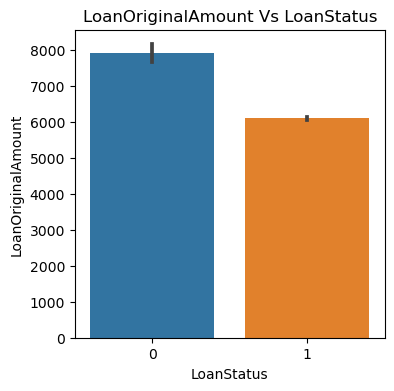

In [126]:
#LoanOriginalAmount Vs LoanStatus

plt.figure(figsize=(4,4))
sns.barplot(x='LoanStatus',y='LoanOriginalAmount',data=Req_Colmn)
plt.title("LoanOriginalAmount Vs LoanStatus")

Text(0.5, 1.0, 'LoanOriginalAmount Vs LoanStatus')

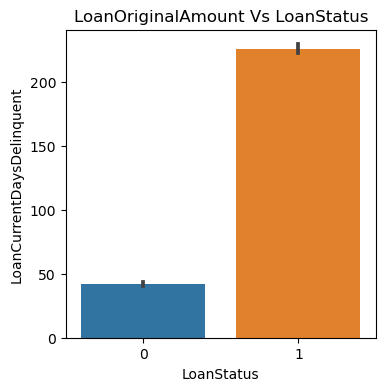

In [127]:
#LoanCurrentDaysDelinquent Vs LoanStatus

plt.figure(figsize=(4,4))
sns.barplot(x='LoanStatus',y='LoanCurrentDaysDelinquent',data=Req_Colmn)
plt.title("LoanOriginalAmount Vs LoanStatus")

Text(0.5, 1.0, 'OpenRevolvingAccounts Vs LoanStatus')

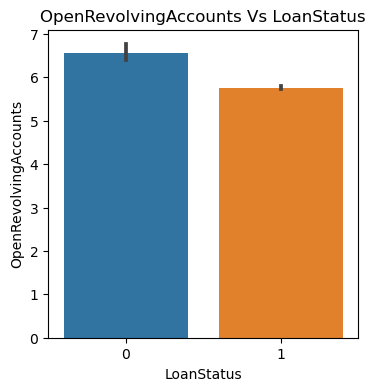

In [128]:
#OpenRevolvingAccounts Vs LoanStatus

plt.figure(figsize=(4,4))
sns.barplot(x='LoanStatus',y='OpenRevolvingAccounts',data=Req_Colmn)
plt.title("OpenRevolvingAccounts Vs LoanStatus")

Text(0.5, 1.0, 'TotalInquiries Vs LoanStatus')

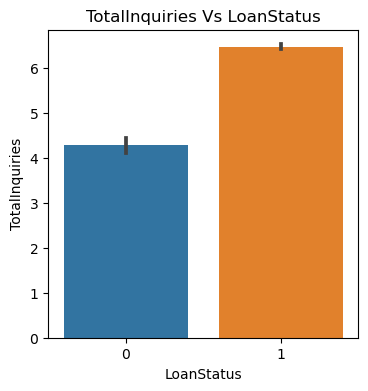

In [129]:
#TotalInquiries Vs LoanStatus

plt.figure(figsize=(4,4))
sns.barplot(x='LoanStatus',y='TotalInquiries',data=Req_Colmn)
plt.title("TotalInquiries Vs LoanStatus")

Text(0.5, 1.0, 'TotalInquiries Vs LoanStatus')

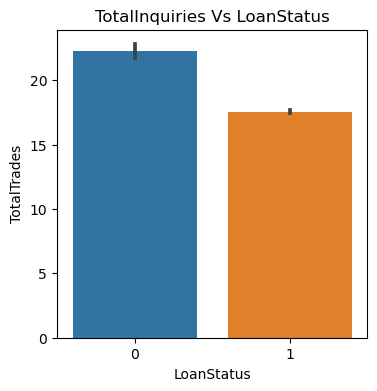

In [130]:
#TotalTrades Vs LoanStatus

plt.figure(figsize=(4,4))
sns.barplot(x='LoanStatus',y='TotalTrades',data=Req_Colmn)
plt.title("TotalInquiries Vs LoanStatus")

## Multivariate Analysis

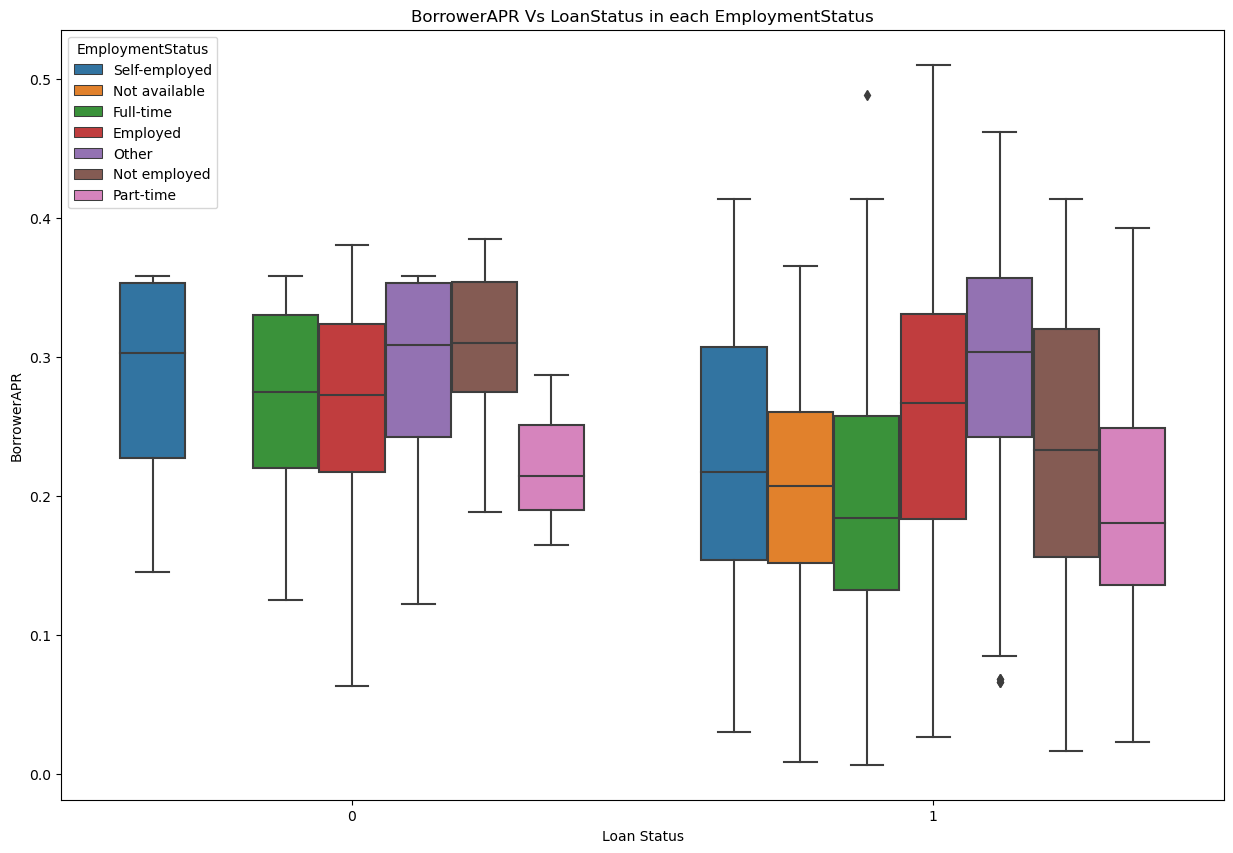

In [131]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[15,10])
sns.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data=Req_Colmn);
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');

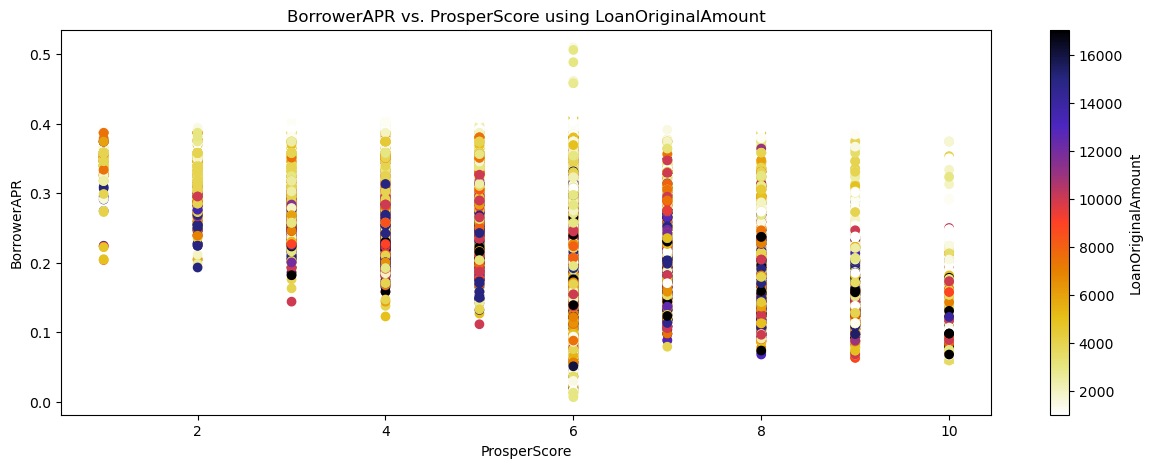

In [132]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data=Req_Colmn,x='ProsperScore',y='BorrowerAPR',c='LoanOriginalAmount',cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

Observation :Loans are taken by people with higher amounts and higher prosper score.

Text(0, 0.5, 'DebtToIncomeRatio')

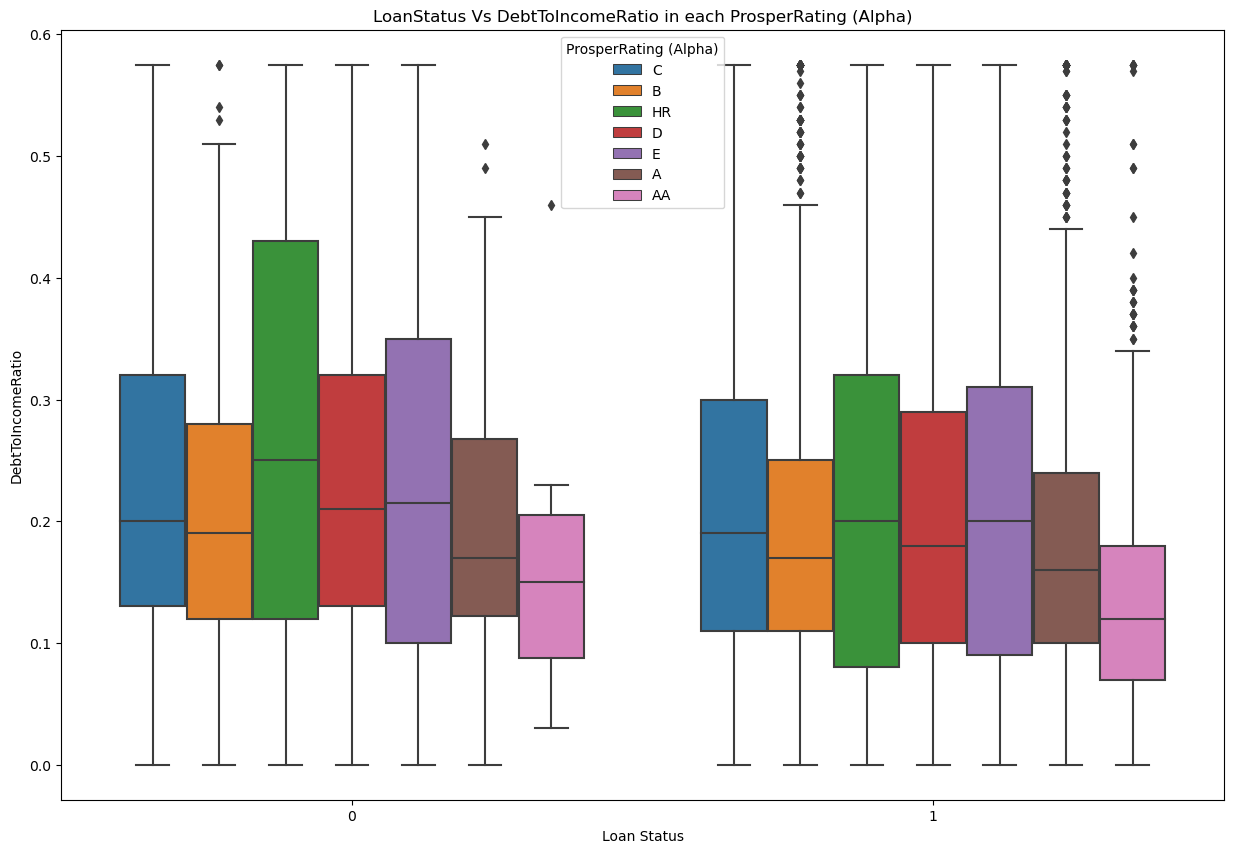

In [133]:
# LoanStatus Vs DebtToIncomeRatio in each ProsperRating (Alpha)
plt.figure(figsize=[15,10])
sns.boxplot(x="LoanStatus", y="DebtToIncomeRatio", hue="ProsperRating (Alpha)", data=Req_Colmn);
plt.title('LoanStatus Vs DebtToIncomeRatio in each ProsperRating (Alpha)');
plt.xlabel('Loan Status');
plt.ylabel('DebtToIncomeRatio')

Observation : The plot shows there is influence of DebtToIncomeRatio on loan status as defaulted group had higherDebtToIncomeRatio.


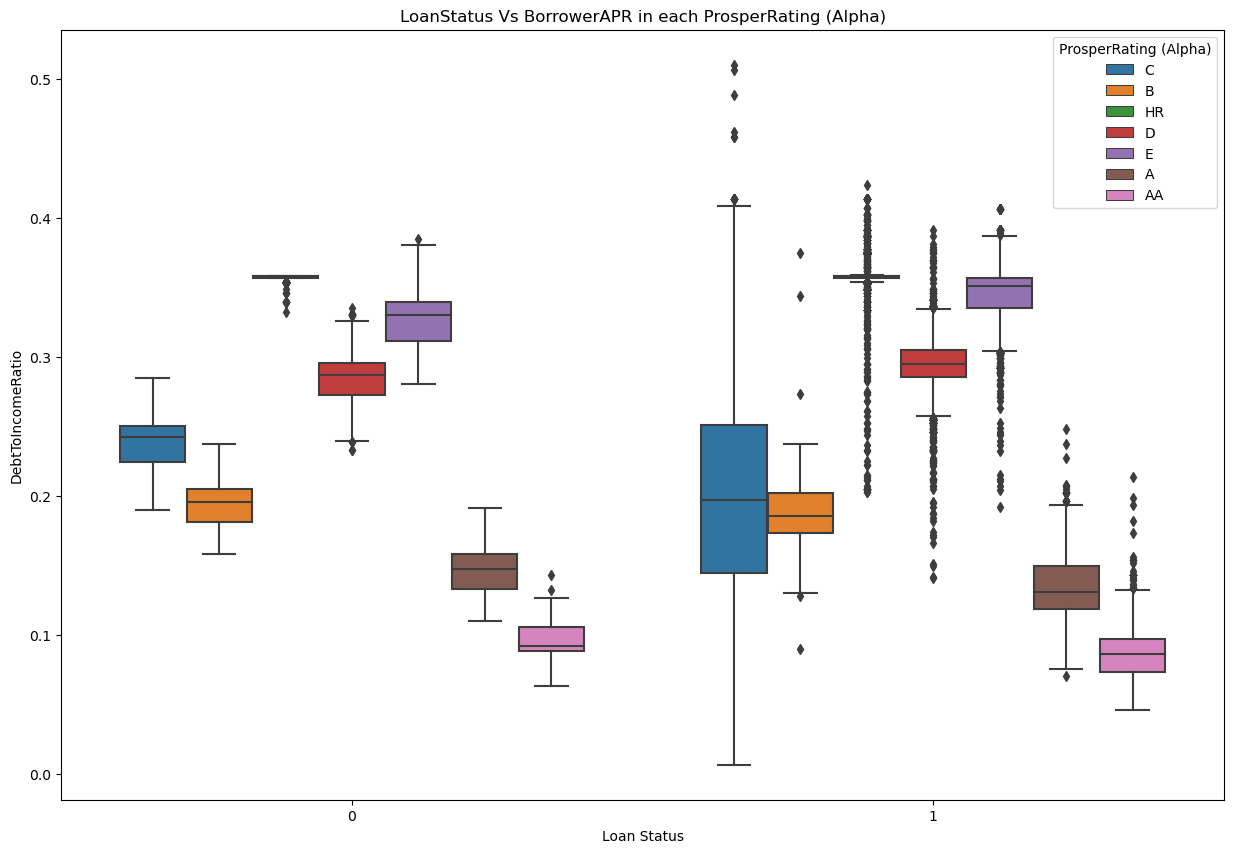

In [134]:
# LoanStatus Vs BorrowerAPR in each ProsperRating (Alpha)
plt.figure(figsize=[15,10])
sns.boxplot(x="LoanStatus", y="BorrowerAPR", hue="ProsperRating (Alpha)", data=Req_Colmn);
plt.title('LoanStatus Vs BorrowerAPR in each ProsperRating (Alpha)');
plt.xlabel('Loan Status');
plt.ylabel('DebtToIncomeRatio');

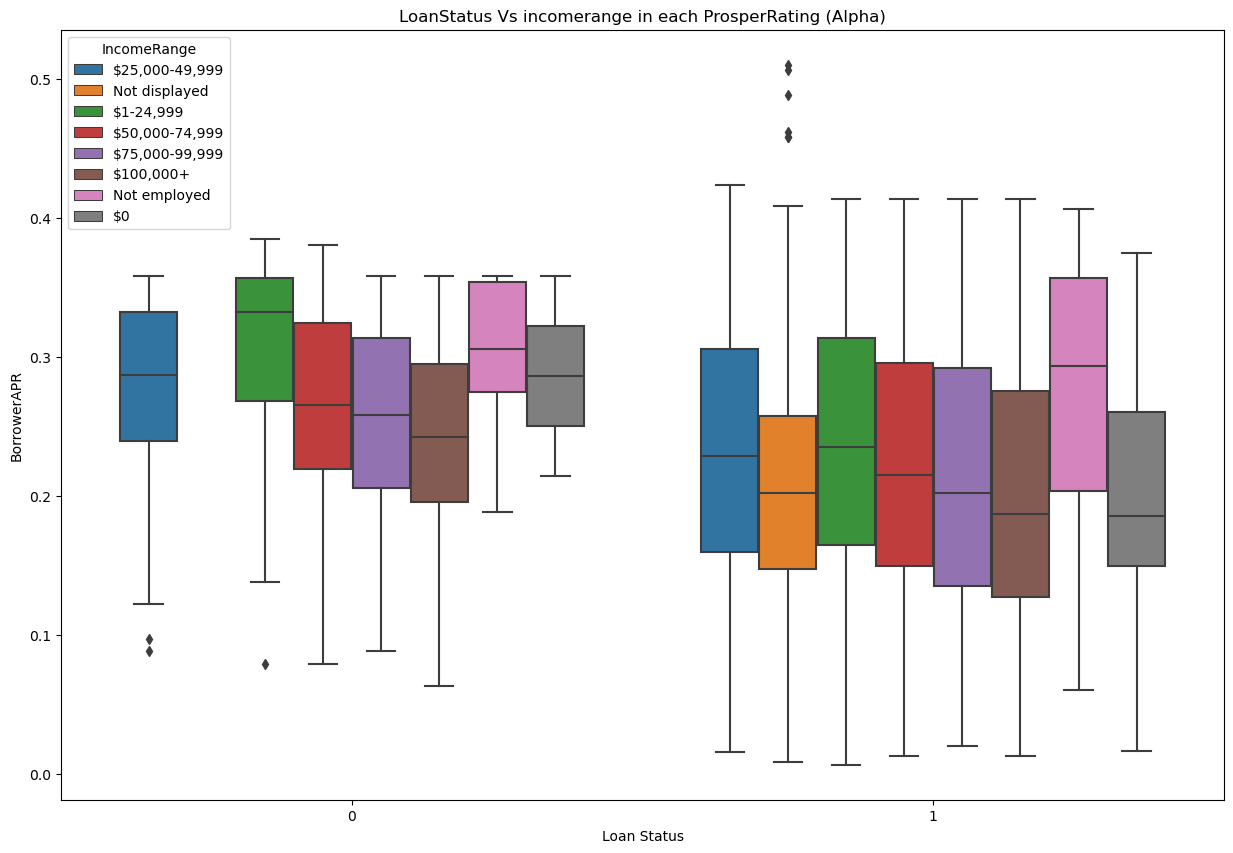

In [135]:
# LoanStatus Vs BorrowerAPR in each incomerange
plt.figure(figsize=[15,10])
sns.boxplot(x="LoanStatus", y="BorrowerAPR", hue="IncomeRange", data=Req_Colmn);
plt.title('LoanStatus Vs incomerange in each ProsperRating (Alpha)');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');